In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc

    
def prior_mu_simple_np():
    return np.random.uniform(-2,2)

def prior_sigma_simple_np():
    return np.random.uniform(1,5) #dist.rvs()

prior_mu = pyabc.UniformPrior(-2,2)
prior_sigma = pyabc.UniformPrior(1,5)

def simulator(mu, sigma): 
    return np.random.normal(mu,abs(sigma),30)

def summary_mean(X): 
    return np.mean(X) 
 
def summary_var(X): 
    return np.var(X)

#observation 
# Set the generating parameters that we will try to infer 
mean0 = 1 
std0 = 3 

# Generate some data (using a fixed seed here) 
np.random.seed(20170525) 
y0 = simulator(mean0, std0) 

#SMC_samp = pyabc.SMCSampler(priors=[prior_mu, prior_sigma], simulator=simulator, summaries=[summary_var, summary_mean], observation=y0)
#SMC_samp.thresholds = np.array([0.01,0.001])

In [2]:
prior_mu = pyabc.UniformPrior(-2,2)
prior_sigma = pyabc.UniformPrior(1,5)
rej_samp = pyabc.RejectionSampler(priors=[prior_mu, prior_sigma], simulator=simulator, summaries=[summary_mean, summary_var], observation=y0)
res = rej_samp.sample(0.25, 500)

Rejection sampler started with threshold: 0.25 and number of samples: 500
Samples:    500 - Threshold: 0.25 - Iterations:     230395 - Time:    16.07 s


In [2]:
prior_mu = pyabc.UniformPrior(-2,2)
prior_sigma = pyabc.UniformPrior(1,5)
SMC_sampler = pyabc.SMCSampler(priors=[prior_mu, prior_sigma], simulator=simulator, summaries=[summary_mean, summary_var], observation=y0)
thetas = SMC_sampler.sample(thresholds=[1,0.5,0.25],nr_samples=500)
SMC_sampler.runtime

SMC sampler started with thresholds: [1, 0.5, 0.25] and number of samples: 500
Rejection sampler started with threshold: 1 and number of samples: 500
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
Samples:    500 - Thresholds: 0.25 - Iterations:     146575 - Time:    67.78 s


67.783444

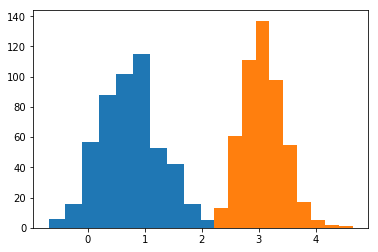

In [6]:
import matplotlib.pyplot as plt
plt.hist(np.matrix(SMC_sampler.Thetas)[:,0])
plt.hist(np.matrix(SMC_sampler.Thetas)[:,1])
def simulator(mu, sigma): 
    return np.random.normal(mu,abs(sigma),30)plt.show()

In [4]:
def simulator(mu): 
    return np.random.normal(mu,std0,30)

prior_mu = pyabc.UniformPrior(-2,2)
SMC_sampler = pyabc.SMCSampler(priors=[prior_mu], simulator=simulator, summaries=[summary_mean, summary_var], observation=y0)
thetas = SMC_sampler.sample(thresholds=[1,0.5,0.25],nr_samples=500)
SMC_sampler.runtime

SMC sampler started with thresholds: [1, 0.5, 0.25] and number of samples: 500
Rejection sampler started with threshold: 1 and number of samples: 500
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
Samples:    500 - Thresholds: 0.25 - Iterations:      87347 - Time:    34.11 s


34.110819